In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Importar algunos módulos nativos de Python
import datetime

# Importar las librerías necesarias
import numpy as np
import pandas as pd

# Puede que nos sirvan también
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    r2_score,
    roc_curve
)

from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)  # Para mayor determinismo

In [3]:
df = pd.read_csv(r'data\train.csv')

In [4]:
print('El número de instancias es {}'.format(df.shape))
df.head(5)

El número de instancias es (453411, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0


In [5]:
df.Weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [6]:
df.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE', 'PRODUCE',
       'DSD GROCERY', 'CANDY, TOBACCO, COOKIES', 'GROCERY DRY GOODS',
       'BOYS WEAR', 'PERSONAL CARE', 'HOUSEHOLD CHEMICALS/SUPP', 'SHOES',
       'FROZEN FOODS', 'SERVICE DELI', 'DAIRY', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'PRE PACKED DELI', 'MENS WEAR', 'HOUSEHOLD PAPER GOODS',
       'CELEBRATION', 'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD',
       'OFFICE SUPPLIES', 'HARDWARE', 'BEAUTY',
       'INFANT CONSUMABLE HARDLINES', 'SHEER HOSIERY',
       'MEAT - FRESH & FROZEN', 'HORTICULTURE AND ACCESS', 'WIRELESS',
       'HOME DECOR', 'TOYS', 'FABRICS AND CRAFTS', 'HOME MANAGEMENT',
       'LAWN AND GARDEN', 'LADIES SOCKS', 'INFANT APPAREL',
       'PLUS AND MATERNITY', 'JEWELRY AND SUNGLASSES', 'ELECTRONICS',
       'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'PETS AND SUPPLIES', 'LIQUOR,WINE,BEER', 'PAINT AND ACCESSORIES',
       'SLEEPWEAR/FOUNDATIONS

In [7]:
print('The unique value of the data {}'.format(df[['VisitNumber']]
                                               .nunique()))
print('The number of the value each VisitNumber: \n{}'.
      format(df['VisitNumber'].value_counts().sort_values(ascending = False).head(5)))

The unique value of the data VisitNumber    67029
dtype: int64
The number of the value each VisitNumber: 
72439    209
88011    151
9181     113
60971    112
65792    111
Name: VisitNumber, dtype: int64


In [8]:
df = df.drop(columns={'Upc','FinelineNumber'})

In [9]:
df.head()

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,999,5,Friday,-1,FINANCIAL SERVICES
1,8,9,Friday,1,IMPULSE MERCHANDISE
2,8,9,Friday,1,PRODUCE
3,8,9,Friday,1,PRODUCE
4,8,10,Friday,1,DSD GROCERY


In [10]:
df.TripType.unique()

array([999,   8,  35,  41,   6,   7,  39,  25,   9,  38,  15,  20,  37,
        32,   5,   3,  40,  21,  31,  42,  24,  33,   4,  36,  18,  29,
        27,  43,  30,  26,  19,  23,  22,  44,  34,  28,  14,  12],
      dtype=int64)

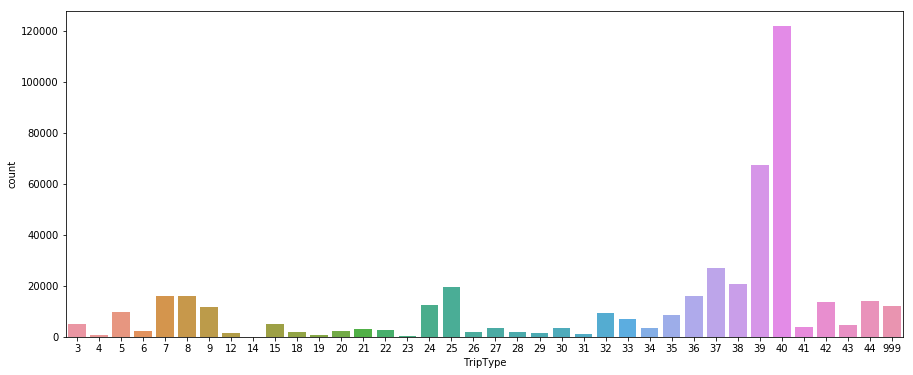

In [11]:
import seaborn as sns
plt.figure (figsize=(15,6))
ax = sns.countplot(x="TripType", data=df)

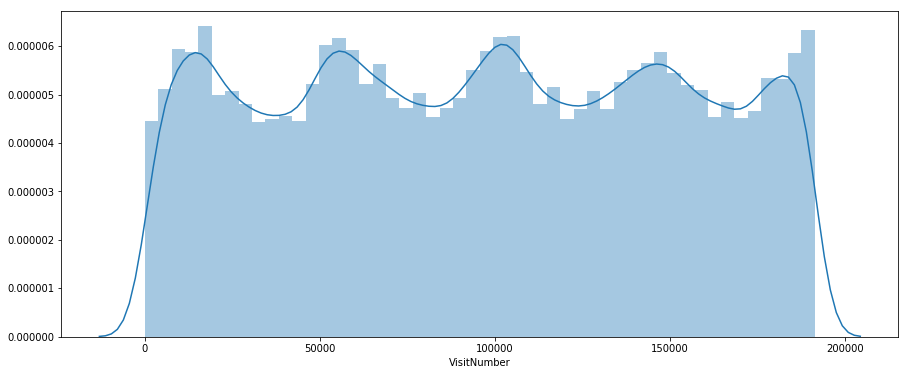

In [12]:
plt.figure (figsize=(15,6))
ax = sns.distplot(df.VisitNumber)


In [13]:
df.ScanCount.unique()

array([ -1,   1,   2,   3,   5,  14,   4,  -2,   9,   7,  10,   6,   8,
        -3,  -5,  11,  16,  -4,  15,  30,  -6,  12,  20,  13,  19,  46,
        23,  24,  -9,  51,  17,  18,  22,  71, -10,  25], dtype=int64)

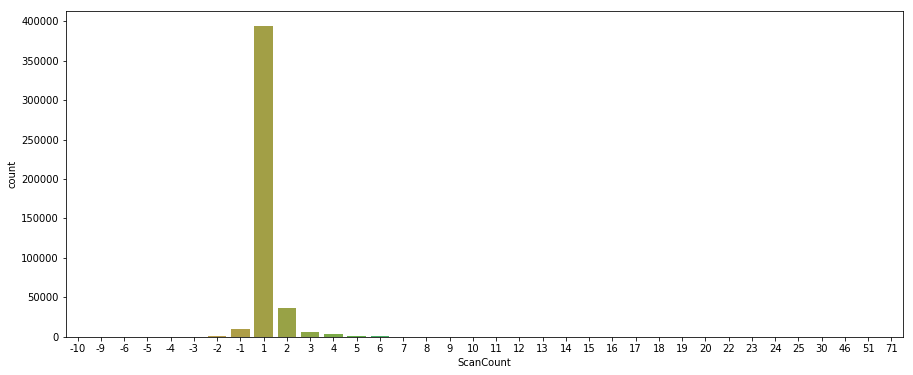

In [14]:
import seaborn as sns
plt.figure (figsize=(15,6))
ax = sns.countplot(x="ScanCount", data=df)

In [15]:
df.Weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

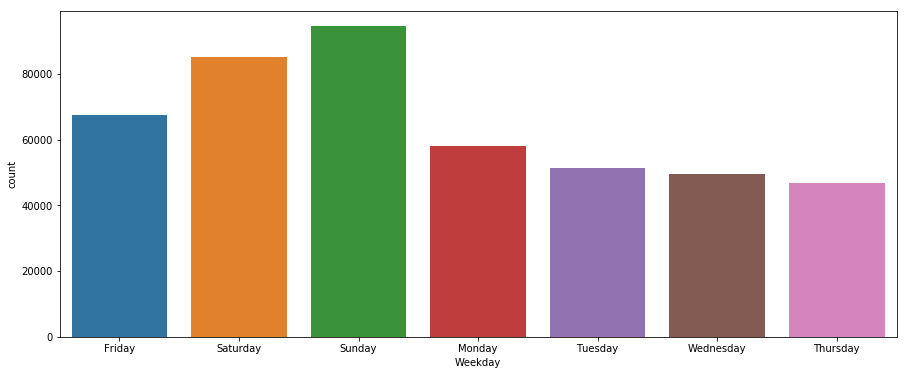

In [16]:

plt.figure (figsize=(15,6))
ax = sns.countplot(x="Weekday", data=df)

In [17]:
df.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE', 'PRODUCE',
       'DSD GROCERY', 'CANDY, TOBACCO, COOKIES', 'GROCERY DRY GOODS',
       'BOYS WEAR', 'PERSONAL CARE', 'HOUSEHOLD CHEMICALS/SUPP', 'SHOES',
       'FROZEN FOODS', 'SERVICE DELI', 'DAIRY', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'PRE PACKED DELI', 'MENS WEAR', 'HOUSEHOLD PAPER GOODS',
       'CELEBRATION', 'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD',
       'OFFICE SUPPLIES', 'HARDWARE', 'BEAUTY',
       'INFANT CONSUMABLE HARDLINES', 'SHEER HOSIERY',
       'MEAT - FRESH & FROZEN', 'HORTICULTURE AND ACCESS', 'WIRELESS',
       'HOME DECOR', 'TOYS', 'FABRICS AND CRAFTS', 'HOME MANAGEMENT',
       'LAWN AND GARDEN', 'LADIES SOCKS', 'INFANT APPAREL',
       'PLUS AND MATERNITY', 'JEWELRY AND SUNGLASSES', 'ELECTRONICS',
       'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
       'PETS AND SUPPLIES', 'LIQUOR,WINE,BEER', 'PAINT AND ACCESSORIES',
       'SLEEPWEAR/FOUNDATIONS

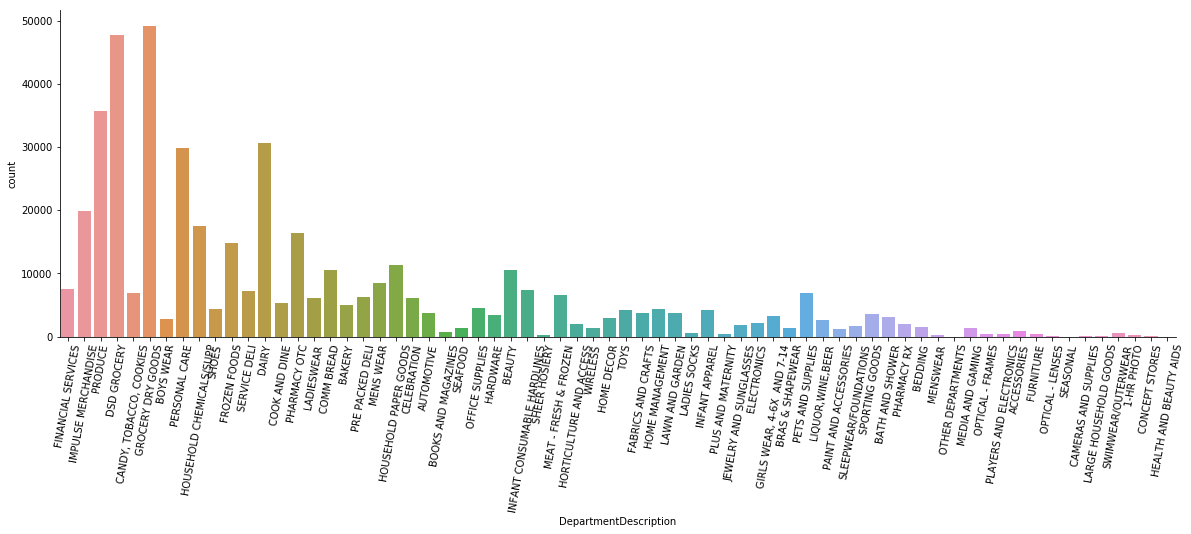

In [18]:

plt.figure (figsize=(20,6))
ax = sns.countplot(x="DepartmentDescription", data=df)
plt.xticks(rotation=80)
sns.despine()

**Veo el % que representa cada clase**

Class=37, n=12059 (2.660%)
Class=5, n=15960 (3.520%)
Class=27, n=8575 (1.891%)
Class=33, n=3903 (0.861%)
Class=3, n=2352 (0.519%)
Class=4, n=16149 (3.562%)
Class=31, n=67525 (14.893%)
Class=17, n=19434 (4.286%)
Class=6, n=11779 (2.598%)
Class=30, n=20660 (4.557%)
Class=9, n=5015 (1.106%)
Class=12, n=2190 (0.483%)
Class=29, n=27192 (5.997%)
Class=24, n=9512 (2.098%)
Class=2, n=9648 (2.128%)
Class=0, n=4846 (1.069%)
Class=32, n=121937 (26.893%)
Class=13, n=3059 (0.675%)
Class=23, n=1252 (0.276%)
Class=34, n=13622 (3.004%)
Class=16, n=12537 (2.765%)
Class=25, n=6999 (1.544%)
Class=1, n=627 (0.138%)
Class=28, n=15879 (3.502%)
Class=10, n=2040 (0.450%)
Class=21, n=1490 (0.329%)
Class=19, n=3263 (0.720%)
Class=35, n=4543 (1.002%)
Class=22, n=3469 (0.765%)
Class=18, n=1749 (0.386%)
Class=11, n=813 (0.179%)
Class=15, n=234 (0.052%)
Class=14, n=2486 (0.548%)
Class=36, n=14048 (3.098%)
Class=26, n=3289 (0.725%)
Class=20, n=1815 (0.400%)
Class=8, n=35 (0.008%)
Class=7, n=1426 (0.315%)


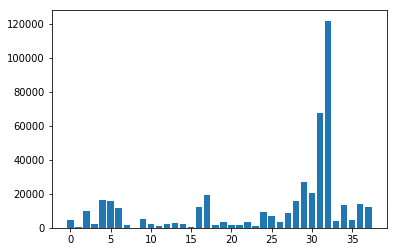

In [19]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
y = df[['TripType']]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Conclusión: 
El dataset se encuentra desbalanceado como se puede observar. Existe categorías con muy pocos casos por lo que es importante 
al correr a los modelos no solamente observar el "accuracy score" sino también las diferentes medidas de clasificación 
y si predice correctamente todas las categorías o solamente algunas. Excluiré la clase 8 (Triptype=14) por tener apenas 35 casos

In [3]:

def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    df_train = df_train[(df_train.FinelineNumber.isnull()==False) & (df_train.Upc.isnull()==False)]
    df_test = df_test[(df_test.FinelineNumber.isnull()==False) & (df_test.Upc.isnull()==False)]

    df_train = df_train[(df_train.TripType!=14)]

    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType
    

    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    df = df[(df.FinelineNumber.isnull()==False) & (df.Upc.isnull()==False)]
    
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

In [4]:
X, y, XX, yy = transform_data(r'train.csv',
                              r'test.csv')

In [5]:
X.shape, y.shape, XX.shape

((66073, 81), (66073,), (28170, 81))

In [6]:
# Divisiòn del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Escenario base

Se corren diferentes modelos con las configuraciones estándar para ver las accuracy que nos otorga cada uno y quedarnos como base line aquel modelo que no solamente realice mejor predicción sino además pueda predecir todas las categorías

### Tree Decision

In [24]:
#ARBOL DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_test_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.5949954595903542
             precision    recall  f1-score   support

          3       0.97      0.96      0.96       798
          4       0.44      0.45      0.45        69
          5       0.61      0.66      0.63       686
          6       0.73      0.71      0.72       268
          7       0.55      0.59      0.57      1196
          8       0.79      0.81      0.80      2513
          9       0.70      0.69      0.70      1990
         12       0.06      0.07      0.06        60
         15       0.33      0.34      0.34       198
         18       0.29      0.24      0.27       137
         19       0.28      0.31      0.29        58
         20       0.52      0.47      0.50       139
         21       0.48      0.48      0.48       146
         22       0.44      0.45      0.44       195
         23       0.52      0.45      0.48        29
         24       0.46      0.42      0.44       561
         25       0.56      0.54      0.55       790
         26       0.34    

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
param_grid = [{"min_samples_split": [2, 8, 16, 25], 
                "max_depth": [None, 2, 5, 10, 15],
                "min_samples_leaf": [1, 5, 10, 15],
                "max_leaf_nodes": [None, 5, 10, 20],
              'criterion': ["gini", "entropy"],
              'class_weight': [None, "balanced"] }]


grid_search_tree = GridSearchCV(tree, param_grid=param_grid,cv=5, scoring='accuracy',return_train_score=True)
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': [2, 8, 16, 25], 'max_depth': [None, 2, 5, 10, 15], 'min_samples_leaf': [1, 5, 10, 15], 'max_leaf_nodes': [None, 5, 10, 20], 'criterion': ['gini', 'entropy'], 'class_weight': [None, 'balanced']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [26]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
optimised_tree = grid_search_tree.best_estimator_
y_test_pred = optimised_tree.predict(X_test)

In [28]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.6359095953990516
             precision    recall  f1-score   support

          3       0.93      0.98      0.96       798
          4       0.78      0.45      0.57        69
          5       0.64      0.72      0.68       686
          6       0.84      0.73      0.78       268
          7       0.58      0.62      0.60      1196
          8       0.77      0.84      0.80      2513
          9       0.69      0.74      0.72      1990
         12       0.00      0.00      0.00        60
         15       0.41      0.29      0.34       198
         18       0.46      0.26      0.33       137
         19       0.31      0.38      0.34        58
         20       0.58      0.50      0.54       139
         21       0.59      0.51      0.55       146
         22       0.61      0.35      0.44       195
         23       0.80      0.28      0.41        29
         24       0.54      0.40      0.46       561
         25       0.58      0.61      0.60       790
         26       0.34    

### Random Forrest

In [29]:
# entrenar el modelo en esta celda
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6602260115023711
             precision    recall  f1-score   support

          3       0.94      0.98      0.96       798
          4       0.74      0.41      0.52        69
          5       0.62      0.74      0.67       686
          6       0.80      0.76      0.78       268
          7       0.59      0.70      0.64      1196
          8       0.79      0.87      0.83      2513
          9       0.71      0.79      0.75      1990
         12       0.12      0.05      0.07        60
         15       0.45      0.37      0.41       198
         18       0.47      0.27      0.34       137
         19       0.47      0.38      0.42        58
         20       0.62      0.50      0.55       139
         21       0.59      0.56      0.57       146
         22       0.59      0.41      0.48       195
         23       0.89      0.28      0.42        29
         24       0.54      0.47      0.50       561
         25       0.57      0.66      0.61       790
         26       0.47    

In [37]:
param_grid = [{'n_estimators': [100, 200, 300, 400, 500, 750, 1000]}]

rf = RandomForestClassifier(class_weight='balanced',
                                   criterion='gini',
                            random_state=0, max_depth = None)


grid_search_rf = GridSearchCV(rf,
                                 param_grid=param_grid,cv=5, 
                                scoring='accuracy',
                                return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 200, 300, 400, 500, 750, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [38]:
grid_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [39]:
optimised_rf = grid_search_rf.best_estimator_
y_test_pred = optimised_rf.predict(X_test)

In [40]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.6955403087478559
             precision    recall  f1-score   support

          3       0.97      0.97      0.97       798
          4       0.93      0.39      0.55        69
          5       0.66      0.78      0.72       686
          6       0.85      0.77      0.81       268
          7       0.75      0.65      0.70      1196
          8       0.83      0.88      0.85      2513
          9       0.73      0.83      0.77      1990
         12       0.40      0.13      0.20        60
         15       0.50      0.38      0.43       198
         18       0.45      0.40      0.43       137
         19       0.44      0.47      0.45        58
         20       0.55      0.67      0.61       139
         21       0.60      0.66      0.63       146
         22       0.51      0.56      0.54       195
         23       0.80      0.41      0.55        29
         24       0.71      0.46      0.56       561
         25       0.68      0.68      0.68       790
         26       0.42    

### SGD

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
sgd = GradientBoostingClassifier(random_state=0)
sgd.fit(X_train, y_train)
y_test_pred = sgd.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7012914942992634
             precision    recall  f1-score   support

          3       0.95      0.98      0.96       798
          4       0.80      0.48      0.60        69
          5       0.68      0.78      0.72       686
          6       0.78      0.78      0.78       268
          7       0.68      0.67      0.67      1196
          8       0.79      0.87      0.83      2513
          9       0.73      0.78      0.75      1990
         12       0.32      0.20      0.25        60
         15       0.55      0.37      0.44       198
         18       0.52      0.36      0.43       137
         19       0.56      0.50      0.53        58
         20       0.58      0.64      0.61       139
         21       0.64      0.69      0.66       146
         22       0.51      0.52      0.52       195
         23       0.75      0.62      0.68        29
         24       0.63      0.63      0.63       561
         25       0.69      0.75      0.72       790
         26       0.49    

### XGBOOST

In [8]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_test_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7076480678034507
              precision    recall  f1-score   support

           3       0.96      0.98      0.97       798
           4       0.79      0.43      0.56        69
           5       0.69      0.75      0.72       686
           6       0.82      0.77      0.80       268
           7       0.73      0.70      0.72      1196
           8       0.83      0.88      0.86      2513
           9       0.74      0.82      0.78      1990
          12       0.39      0.18      0.25        60
          15       0.65      0.42      0.51       198
          18       0.47      0.34      0.39       137
          19       0.52      0.59      0.55        58
          20       0.55      0.57      0.56       139
          21       0.63      0.62      0.63       146
          22       0.57      0.53      0.55       195
          23       0.76      0.55      0.64        29
          24       0.62      0.60      0.61       561
          25       0.69      0.77      0.73       790
        

### Bagging Classifier

In [8]:
bagging_xgb = BaggingClassifier(base_estimator= XGBClassifier())
bagging_xgb.fit(X_train, y_train)
y_test_pred = bagging_xgb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7166784380990818
              precision    recall  f1-score   support

           3       0.96      0.98      0.97       798
           4       0.89      0.45      0.60        69
           5       0.68      0.77      0.72       686
           6       0.83      0.78      0.80       268
           7       0.73      0.72      0.72      1196
           8       0.84      0.88      0.86      2513
           9       0.74      0.84      0.79      1990
          12       0.42      0.18      0.26        60
          15       0.69      0.42      0.53       198
          18       0.52      0.33      0.40       137
          19       0.55      0.53      0.54        58
          20       0.55      0.59      0.57       139
          21       0.63      0.66      0.64       146
          22       0.55      0.50      0.52       195
          23       0.86      0.66      0.75        29
          24       0.63      0.63      0.63       561
          25       0.69      0.78      0.74       790
        

### Conclusión

    Luego de la exploración de modelos desde los más básicos hasta los más sofistificados el modelo que mejor resultado dió es el XGBOOST usando el ensambling de BaggingClassifier en sus configuraciones básicas ya que el grid search toma demasiado tiempo y no están garantizadas mejoras o en su defecto las mejoras resultarán marginales.  El resultado final es un accuracy de 0.7166 que es superior al modelo XGBOOST simple que se corrió

In [9]:
# Realizamos predicciones para el set de Evaluación
X.shape, XX.shape

((66073, 81), (28170, 81))

In [12]:
yy = bagging_xgb.predict(XX)

In [13]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [15]:
submission.to_csv("submission_bagging_XBOOST.csv", header=True, index=False)